# Criando uma enquete e calculando porcentagem de votos

✔️ Lê votos do usuário via input()
✔️ Calcula porcentagens
✔️ Gera gráfico de pizza com matplotlib
✔️ Salva resultados em CSV e JSON
✔️ Tudo encapsulado em funções reutilizáveis

🗳️ Enquete: Qual a importância na sua escolha?
Digite o número da opção (0 para encerrar)

Opções:
1 - ⭐ Extremamente importante – decisivo na escolha
2 - 👍 Muito importante – faz grande diferença
3 - 🤔 Importante, mas não essencial
4 - ❌ Pouco ou nada importante
0 - Encerrar votação
✅ Voto computado!

Opções:
1 - ⭐ Extremamente importante – decisivo na escolha
2 - 👍 Muito importante – faz grande diferença
3 - 🤔 Importante, mas não essencial
4 - ❌ Pouco ou nada importante
0 - Encerrar votação
✅ Voto computado!

Opções:
1 - ⭐ Extremamente importante – decisivo na escolha
2 - 👍 Muito importante – faz grande diferença
3 - 🤔 Importante, mas não essencial
4 - ❌ Pouco ou nada importante
0 - Encerrar votação
✅ Voto computado!

Opções:
1 - ⭐ Extremamente importante – decisivo na escolha
2 - 👍 Muito importante – faz grande diferença
3 - 🤔 Importante, mas não essencial
4 - ❌ Pouco ou nada importante
0 - Encerrar votação
✅ Voto computado!

Opções:
1 - ⭐ Extremamente importante – decisivo na escol

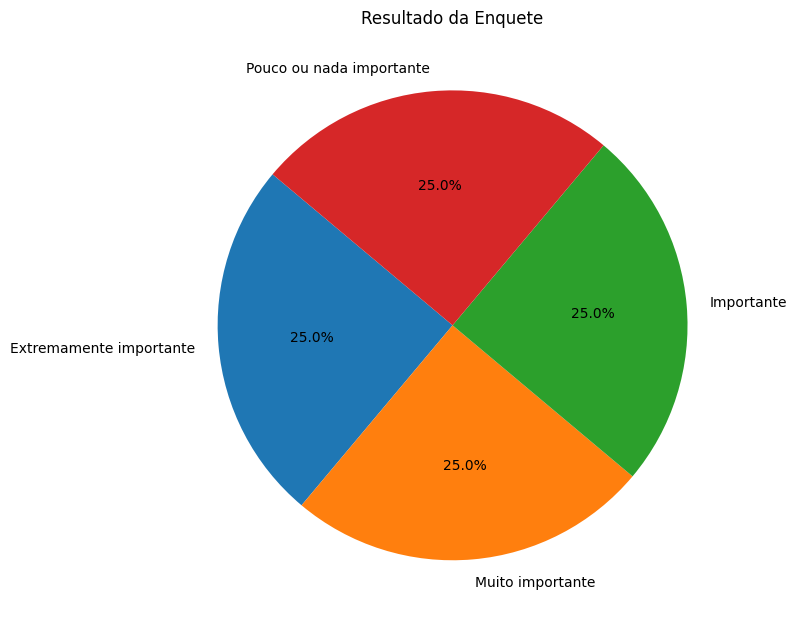

💾 Resultados salvos em CSV e JSON!


In [3]:
import json
import csv
import matplotlib.pyplot as plt


def criar_enquete():
    return [
        "⭐ Extremamente importante – decisivo na escolha",
        "👍 Muito importante – faz grande diferença",
        "🤔 Importante, mas não essencial",
        "❌ Pouco ou nada importante"
    ]


def inicializar_votos(opcoes):
    return {opcao: 0 for opcao in opcoes}


def ler_votos_em_loop(opcoes, votos):
    print("🗳️ Enquete: Qual a importância na sua escolha?")
    print("Digite o número da opção (0 para encerrar)\n")

    while True:
        print("Opções:")
        for i, opcao in enumerate(opcoes, start=1):
            print(f"{i} - {opcao}")
        print("0 - Encerrar votação")

        try:
            escolha = int(input("\nSeu voto: "))

            if escolha == 0:
                print("\n⛔ Votação encerrada!\n")
                break

            if 1 <= escolha <= len(opcoes):
                votos[opcoes[escolha - 1]] += 1
                print("✅ Voto computado!\n")
            else:
                print("❌ Opção inválida.\n")

        except ValueError:
            print("❌ Digite apenas números.\n")

    return votos


def calcular_porcentagens(votos):
    total = sum(votos.values())
    porcentagens = {}

    for opcao, quantidade in votos.items():
        porcentagens[opcao] = (quantidade / total) * 100 if total > 0 else 0

    return total, porcentagens


def gerar_grafico_pizza(votos):
    labels = [
        "Extremamente importante",
        "Muito importante",
        "Importante",
        "Pouco ou nada importante"
    ]

    plt.figure(figsize=(8, 8))
    plt.pie(
        votos.values(),
        labels=labels,
        autopct="%1.1f%%",
        startangle=140
    )
    plt.title("Resultado da Enquete")
    plt.tight_layout()
    plt.show()


def salvar_csv(votos, porcentagens, arquivo="resultado_enquete.csv"):
    with open(arquivo, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Opção", "Votos", "Porcentagem"])

        for opcao in votos:
            writer.writerow([
                opcao,
                votos[opcao],
                f"{porcentagens[opcao]:.2f}%"
            ])


def salvar_json(votos, porcentagens, arquivo="resultado_enquete.json"):
    dados = {
        opcao: {
            "votos": votos[opcao],
            "porcentagem": round(porcentagens[opcao], 2)
        }
        for opcao in votos
    }

    with open(arquivo, "w", encoding="utf-8") as f:
        json.dump(dados, f, ensure_ascii=False, indent=4)


def executar_enquete():
    opcoes = criar_enquete()
    votos = inicializar_votos(opcoes)

    ler_votos_em_loop(opcoes, votos)

    total, porcentagens = calcular_porcentagens(votos)

    print(f"📊 Total de votos: {total}\n")
    for opcao in votos:
        print(f"{opcao}")
        print(f"Votos: {votos[opcao]} ({porcentagens[opcao]:.2f}%)\n")

    if total > 0:
        gerar_grafico_pizza(votos)
        salvar_csv(votos, porcentagens)
        salvar_json(votos, porcentagens)
        print("💾 Resultados salvos em CSV e JSON!")
    else:
        print("⚠️ Nenhum voto registrado.")


# Executa
executar_enquete()
